<a href="https://colab.research.google.com/github/Lital-Ben-Baruch/IrisClassification/blob/main/RegularizedLogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part B - linear regression  


In this exercise, you will build an ordered logistic regression classifier to predict whether chips from a factory **pass** the quality assurance (QA) stage. The QA process involves **conducting tests on each chip** to ensure its proper functioning. As the manager responsible for the factory's product line, you have **access to the test results for a few chips**, obtained from **two different tests**. Based on the results of these tests, you need to determine whether to **accept or reject the microchips**. By analyzing the test results dataset using logistic regression, you can create a model that will assist you in making informed decisions regarding the acceptance or rejection of the microchips.


### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

 ### Step 2. load and visualize the test results
  load the data file and visualize the test results on a two-dimensional plot, where the data points are separated based on the chip test outcomes, as depicted in the example figure (the actual appearance of the graph may differ).

 #### Importing the dataset from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Read the data file

In [ ]:
def read_database(file_path):
    # Read the database using pandas without header row
    df = pd.read_csv(file_path, header=None, names=["Test 1", "Test 2", "Test Outcome"])

    # Separate the input features (X) and the output labels (y)
    X = df.iloc[:, :-1]  # Assuming the input features are in all but the last column
    y = df.iloc[:, -1]   # Assuming the output labels are in the last column

    return df, X, y

In [ ]:
# Read the data file containing test results
file_path_B = "/content/drive/My Drive/Summaries _ML_AI_CV/data_sets/Logistic_regression/ex2data2.txt"
df_chips, X, y = read_database(file_path_B)

In [ ]:
df_chips.head()

,Test 1,Test 2,Test Outcome
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Test 1  118 non-null    float64
 1   Test 2  118 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 118 entries, 0 to 117
Series name: Test Outcome
Non-Null Count  Dtype
--------------  -----
118 non-null    int64
dtypes: int64(1)
memory usage: 1.0 KB


#### Scatter plot visualization

In this code, the variable df_chips represents the loaded dataset containing the chip test results. The variables passed and failed represent subsets of the data where the chip test outcome is 'Pass' and 'Fail', respectively. The scatter plot visualizes the test results, with data points that passed the test shown in green and data points that failed the test shown in red. The x-axis represents 'Test 1', which is one type of test, and the y-axis represents 'Test 2', which is another type of test. The plot is given a title of 'Chip Test Results' to provide context, and a legend is displayed to explain the colors and corresponding test outcomes.

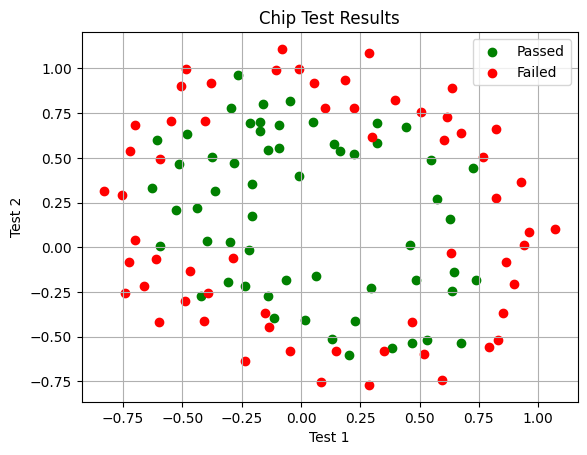

In [ ]:
# Separate the data based on chip test outcomes
passed = df_chips[df_chips['Test Outcome'] == 1] # DataFrame.
failed = df_chips[df_chips['Test Outcome'] == 0] # DataFrame.

# Plot the data points
plt.scatter(passed['Test 1'], passed['Test 2'], c='green', label='Passed')  # Plotting the data points that passed the test
plt.scatter(failed['Test 1'], failed['Test 2'], c='red', label='Failed')  # Plotting the data points that failed the test

# Set labels, title, and legend
plt.xlabel('Test 1')  # X-axis label indicating the type of test
plt.ylabel('Test 2')  # Y-axis label indicating another type of test
plt.title('Chip Test Results')  # Title of the plot indicating the context of the data
plt.legend()  # Display the legend showing the colors and corresponding test outcomes
plt.grid(True)

# Show the plot
plt.show()

Notice that a linear classifier fails to effectively separate the test outcomes, as depicted in the data figure.

 ### Step 3. mapFeature
 To enable the separation of data using a classifier, we need to create a new function called "mapFeature." This function will generate additional features based on the existing features X1 and X2. Specifically, it will generate polynomial terms of X1 and X2 up to the sixth power.

\
\begin{align*}
\text{mapFeature}(X_1, X_2) &= \begin{bmatrix}
1\\
x_1 \\
x_2 \\
x_1^2 \\
x_1x_2 \\
x_2^2 \\
x_1^3 \\
\vdots \\
x_1  x_2^5 \\
x_2^6 \\
\end{bmatrix}
\end{align*}


This equation represents the `mapFeature` function applied to the variables $X_1$ and $X_2$, which generates the vector on the right side of the equation. Each element in the vector corresponds to a specific polynomial term of $X_1$ and $X_2$ up to the sixth power.

The function mapFeature essentially iterates over the degrees of the polynomial features and generates the corresponding features by raising X1 to the appropriate power and multiplying it by the corresponding power of X2. It dynamically adds these new features as columns to the DataFrame. The resulting DataFrame, mapped_features, contains the additional polynomial features based on the original features X1 and X2.

In this mapFeature function, a bias term is added as the first column in the mapped_features DataFrame by including 'Bias': 1 in the initial dictionary. This ensures that a column of 1s is added as the bias term in the resulting DataFrame.

In [ ]:
def mapFeature(X1, X2):
    degree = 6
    index = X1.index  # Get the index from X1 or X2 (assuming they have the same index)
    mapped_features = pd.DataFrame({'Bias': 1}, index=index) # Initializing the DataFrame with the bias column

    for i in range(1, degree + 1):
        for j in range(i + 1):
            feature = (X1 ** (i - j)) * (X2 ** j)
            column_name = f'X1^{i-j} * X2^{j}'
            mapped_features[column_name] = feature

    return mapped_features

X_mapped = mapFeature(X['Test 1'], X['Test 2'])
X_mapped.head()

,Bias,X1^1 * X2^0,X1^0 * X2^1,X1^2 * X2^0,X1^1 * X2^1,X1^0 * X2^2,X1^3 * X2^0,X1^2 * X2^1,X1^1 * X2^2,X1^0 * X2^3,...,X1^2 * X2^3,X1^1 * X2^4,X1^0 * X2^5,X1^6 * X2^0,X1^5 * X2^1,X1^4 * X2^2,X1^3 * X2^3,X1^2 * X2^4,X1^1 * X2^5,X1^0 * X2^6
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


Initializing the DataFrame with the bias column allows you to ensure that all rows have a constant value of 1 in the bias column, which is needed for the intercept term. By starting with the bias column initialized to 1, you can then populate the DataFrame with the remaining mapped features in the subsequent loops.

Note: Adding a bias term (also known as an intercept term) to the input features `X` in logistic regression is necessary because it allows the logistic regression model to fit more complex decision boundaries and better capture the relationships between the features and the target variable.

Here are a few reasons why adding a bias term is important in logistic regression:

1. Capture the baseline or average response: The bias term represents the constant term in the logistic regression equation. It allows the model to capture the baseline or average response when all the other feature values are zero. Without the bias term, the model would always pass through the origin, assuming a response of zero when all features are zero.

2. Adjust the intercept of the decision boundary: The decision boundary of a logistic regression model is a hyperplane that separates the different classes. Adding a bias term allows the decision boundary to be adjusted horizontally (along the y-axis) and vertically (along the x-axis). This flexibility helps the model to better fit the data and improve its predictive performance.

3. Handle data with non-zero means: If the input features have non-zero means, omitting the bias term would introduce a systematic bias in the predictions. By including the bias term, the logistic regression model can account for the offset introduced by the non-zero means of the features.

4. Handle cases where features have zero variance: If a feature has zero variance (i.e., all values are the same), omitting the bias term would result in undefined coefficients. Including the bias term ensures that the model can still make predictions even when the variance of a feature is zero.

In summary, adding a bias term in logistic regression allows the model to capture the intercept, adjust the decision boundary, handle non-zero means, and handle cases where features have zero variance. It improves the flexibility and performance of the model in capturing complex relationships between the features and the target variable.

In [ ]:
X_mapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bias         118 non-null    int64  
 1   X1^1 * X2^0  118 non-null    float64
 2   X1^0 * X2^1  118 non-null    float64
 3   X1^2 * X2^0  118 non-null    float64
 4   X1^1 * X2^1  118 non-null    float64
 5   X1^0 * X2^2  118 non-null    float64
 6   X1^3 * X2^0  118 non-null    float64
 7   X1^2 * X2^1  118 non-null    float64
 8   X1^1 * X2^2  118 non-null    float64
 9   X1^0 * X2^3  118 non-null    float64
 10  X1^4 * X2^0  118 non-null    float64
 11  X1^3 * X2^1  118 non-null    float64
 12  X1^2 * X2^2  118 non-null    float64
 13  X1^1 * X2^3  118 non-null    float64
 14  X1^0 * X2^4  118 non-null    float64
 15  X1^5 * X2^0  118 non-null    float64
 16  X1^4 * X2^1  118 non-null    float64
 17  X1^3 * X2^2  118 non-null    float64
 18  X1^2 * X2^3  118 non-null    float64
 19  X1^1 * X

 ### Step 4. write a logistic regression function called CostFunctionReg
 The dataset (X), the associated labels (Y), the lambda ($\lambda$) value, and the set of weights ($\theta$ ) are all inputs that the function accepts. In addition to the suitable gradients vector for the updating of the set of weights (theta) supplied to the function, the function will also return the value of the price function that was received.

 the CostFunctionReg logistic regression function that calculates the cost function and gradients, given the dataset X, labels Y, lambda value, and weights theta as inputs:

In [ ]:
def sigmoid(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

def CostFunctionReg(theta, X, Y, lambda_val):
    """Compute cost function and gradients for logistic regression with regularization"""

    m = len(Y)  # Number of training examples

    # Compute the hypothesis
    h = sigmoid(X.dot(theta))

    # Compute the regularization term
    regularization = (lambda_val / (2 * m)) * np.sum(theta[1:] ** 2)

    # Compute the cost function
    J = (-1 / m) * (Y.dot(np.log(h)) + (1 - Y).dot(np.log(1 - h))) + regularization

    # Compute the gradients
    # for j=0
    grad = (1 / m) * X.T.dot(h - Y)
    # for j>=1
    grad[1:] += (lambda_val / m) * theta[1:]

    return J, grad


 ### Step 5.  Create a suitable classifier
*  Create a suitable classifier using a learning process on the ex2data2.text data set based on the CostFunctionReg function.
*  Plot the cost function's value as a function of how each iteration is progressing.
* What is the decision threshold that you get?
* Embed  the decision threshold in the fresh data.
* Plot the decision boundary and fresh data.

##### Create a suitable classifier using a learning process on the ex2data2.text data set based on the CostFunctionReg function.

In [ ]:
def train(X, y, lambda_val, num_iterations, learning_rate):
    """Train the logistic regression model"""
    # Initialize the weights
    initial_theta = np.zeros(X.shape[1])
    # Initialize lists to store the cost values and iteration numbers
    costs = []
    iterations = []

    # Perform gradient descent
    for i in range(num_iterations):
        # Compute the cost and gradients
        cost, gradients = CostFunctionReg(initial_theta, X, y, lambda_val)

        # Update the weights (lec 3 p. 18)
        initial_theta -= learning_rate * gradients

        # Store the cost and iteration number
        costs.append(cost)
        iterations.append(i + 1)

    return initial_theta, costs, iterations

##### Plot the cost function's value as a function of how each iteration is progressing.

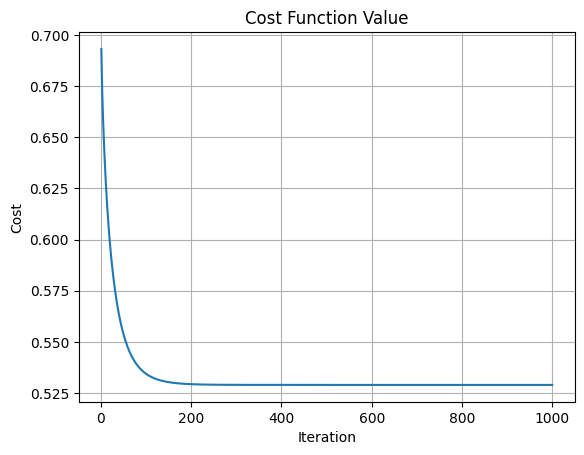

In [ ]:
# Set the parameters for training
lambda_val = 1
num_iterations = 1000
learning_rate = 1

# Train the logistic regression model
theta, costs, iterations = train(X_mapped.values, y.values, lambda_val, num_iterations, learning_rate)

# Plot the cost function value as a function of the iteration number
plt.plot(iterations, costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Value')
plt.grid(True)
plt.show()

 ##### What is the decision threshold that you get?

In [ ]:
def mapFeature_np(X1, X2):
    degree = 6
    m = len(X1)  # Number of training examples
    mapped_features = np.ones((m, 1))  # Initializing the mapped features with bias term

    for i in range(1, degree + 1):
        for j in range(i + 1):
            feature = (X1 ** (i - j)) * (X2 ** j)
            mapped_features = np.hstack((mapped_features, feature.reshape(-1, 1)))

    return mapped_features

# Plot the decision boundary
def plot_decision_boundary(theta_trained, X, y):
    # Create a meshgrid of x1 and x2 values
    x1_min, x1_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    x2_min, x2_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    #  The np.linspace function is used to create evenly spaced values between the minimum and maximum values of x1 and x2.
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

    # Map the meshgrid feature values
    # This transforms the meshgrid feature values to the same polynomial feature space used during training.
    X_mapped = mapFeature_np(xx1.ravel(), xx2.ravel())

    # Calculate the predicted probabilities (lec 3 p.13)
    z = X_mapped.dot(theta)
    h = sigmoid(z)
    h = h.reshape(xx1.shape)

    # Plot the decision boundary
    plt.contour(xx1, xx2, h, levels=[0.5], colors='green')
    plt.legend()

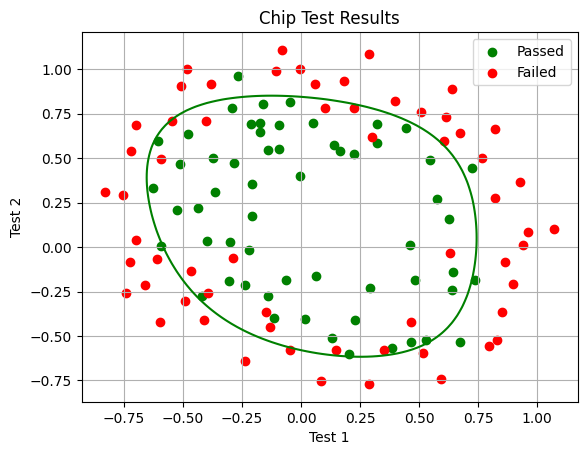

In [ ]:
# Plot the data points
plt.scatter(passed['Test 1'], passed['Test 2'], c='green', label='Passed')  # Plotting the data points that passed the test
plt.scatter(failed['Test 1'], failed['Test 2'], c='red', label='Failed')  # Plotting the data points that failed the test

# Plot the decision boundary
plot_decision_boundary(theta, X, y)

# Set labels, title, and legend
plt.xlabel('Test 1')  # X-axis label indicating the type of test
plt.ylabel('Test 2')  # Y-axis label indicating another type of test
plt.title('Chip Test Results')  # Title of the plot indicating the context of the data
plt.legend()  # Display the legend showing the colors and corresponding test outcomes

plt.grid(True)
# Show the plot
plt.show()

##### Embed the decision threshold in the fresh data.


In [ ]:
# Decision threshold
decision_threshold = 0.5

# Generate fresh test results
fresh_test_results = np.array([[0.4, 0.6], [0.7, 0.3], [0.2, 0.8], [0.9, 0.9]])

# Embed the decision threshold in the fresh data
df_fresh = pd.DataFrame({'Test 1': fresh_test_results[:, 0], 'Test 2': fresh_test_results[:, 1]})
X_fresh_mapped = mapFeature(df_fresh['Test 1'], df_fresh['Test 2'])
predictions = sigmoid(X_fresh_mapped.dot(theta))
df_fresh['Prediction'] = (predictions >= decision_threshold).astype(int)

# Print the fresh data with predictions
print(df_fresh)


   Test 1  Test 2  Prediction
0     0.4     0.6           1
1     0.7     0.3           1
2     0.2     0.8           1
3     0.9     0.9           0


##### Plot the decision boundary and fresh data

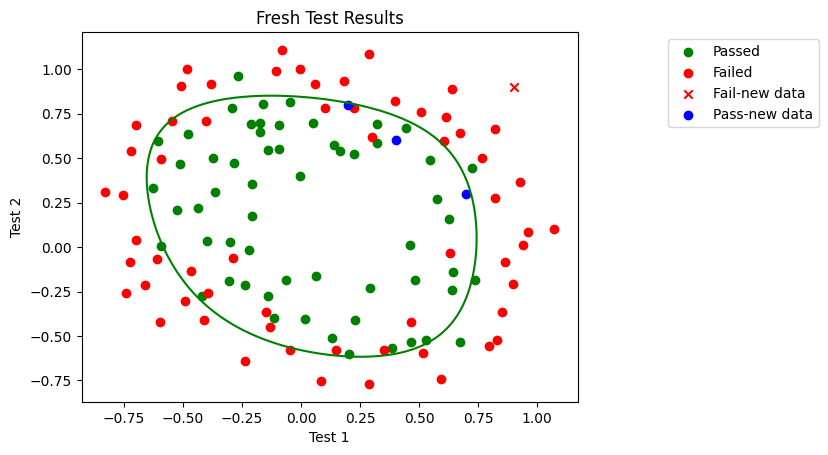

In [ ]:
# Plot the decision boundary and fresh data
# old data
# Plot the data points
plt.scatter(passed['Test 1'], passed['Test 2'], c='green', label='Passed')  # Plotting the data points that passed the test
plt.scatter(failed['Test 1'], failed['Test 2'], c='red', label='Failed')  # Plotting the data points that failed the test

plot_decision_boundary(theta, X, y)
plt.scatter(df_fresh[df_fresh['Prediction'] == 0]['Test 1'], df_fresh[df_fresh['Prediction'] == 0]['Test 2'], color='red', marker='x', label='Fail-new data')
plt.scatter(df_fresh[df_fresh['Prediction'] == 1]['Test 1'], df_fresh[df_fresh['Prediction'] == 1]['Test 2'], color='blue', marker='o', label='Pass-new data')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Fresh Test Results')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))
plt.show()

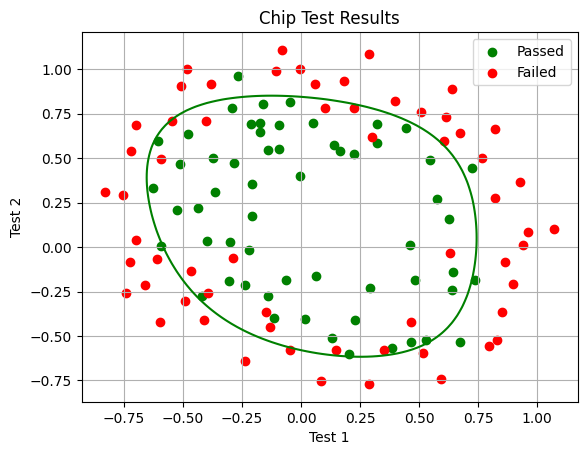

In [ ]:
# Plot the data points
plt.scatter(passed['Test 1'], passed['Test 2'], c='green', label='Passed')  # Plotting the data points that passed the test
plt.scatter(failed['Test 1'], failed['Test 2'], c='red', label='Failed')  # Plotting the data points that failed the test

# Plot the decision boundary
plot_decision_boundary(theta, X, y)

# Set labels, title, and legend
plt.xlabel('Test 1')  # X-axis label indicating the type of test
plt.ylabel('Test 2')  # Y-axis label indicating another type of test
plt.title('Chip Test Results')  # Title of the plot indicating the context of the data
plt.legend()  # Display the legend showing the colors and corresponding test outcomes

plt.grid(True)
# Show the plot
plt.show()

 ### Step 5.  Accuracy percentage
  Calculate the accuracy percentage of the classifier you built on the training set. That is, what percentage of the samples he predicted correctly. Evaluate the nature of the result, how in your opinion the performance of the classifier can be improved (ideas must be given without actual implementation).

In [ ]:
theta

array([ 1.27272666,  0.62526711,  1.18108002, -2.01993057, -0.91739552,
       -1.43161788,  0.12401453, -0.36554077, -0.3572596 , -0.17511391,
       -1.45816787, -0.05101375, -0.61556876, -0.2747002 , -1.19282161,
       -0.24218161, -0.20601493, -0.04475556, -0.27778238, -0.29538161,
       -0.45637191, -1.04321667,  0.02775438, -0.29244176,  0.01555195,
       -0.32738428, -0.14388399, -0.92468352])

In [ ]:
# Calculate the predicted labels
predicted_labels = (sigmoid(X_mapped.dot(theta)) >= decision_threshold).astype(int)

# Calculate the accuracy percentage
accuracy = (predicted_labels == y.values).mean() * 100

print("Accuracy on the training set: {:.2f}%".format(accuracy))


Accuracy on the training set: 83.05%


In terms of evaluating the nature of the result and improving the performance of the classifier, here are some ideas:

Feature Engineering: Analyze and experiment with different combinations or transformations of features to capture more meaningful information. You can try adding higher-order polynomial features, interaction terms, or other domain-specific transformations.

Regularization Parameter: Experiment with different values of the regularization parameter (lambda) to find the optimal balance between reducing overfitting and maintaining model complexity. Perform cross-validation or grid search to systematically evaluate different lambda values.

Model Selection: Consider using different classification algorithms or ensemble methods to see if they can better capture the underlying patterns in the data. For example, you can try decision trees, random forests, support vector machines (SVM), or neural networks.

Data Augmentation: If you have a limited amount of data, consider augmenting your dataset by generating synthetic samples or applying data augmentation techniques. This can help improve the generalization ability of the classifier.

Error Analysis: Analyze the misclassified examples and look for common patterns or sources of errors. This can provide insights into the limitations of the current classifier and guide you in refining the model or collecting more informative features.

Ensemble Methods: Consider using ensemble methods, such as bagging or boosting, to combine multiple classifiers and improve the overall performance. Each individual classifier can be trained on different subsets of the data or with different feature subsets.

Cross-Validation: Perform cross-validation to get a more reliable estimate of the model's performance. This helps to evaluate the classifier's generalization ability and identify potential issues with overfitting or underfitting.

Hyperparameter Tuning: Perform systematic hyperparameter tuning to find the optimal values for various parameters, such as learning rate, regularization parameter, or model-specific parameters. This can be done using techniques like grid search, random search, or Bayesian optimization.

Data Preprocessing: Consider applying appropriate data preprocessing techniques such as scaling, normalization, or handling missing values. Preprocessing steps can have a significant impact on the model's performance and stability.

Model Evaluation Metrics: Consider using additional evaluation metrics such as precision, recall, F1-score, or ROC curve analysis to assess the classifier's performance from different perspectives. This can help you gain a deeper understanding of the strengths and weaknesses of the model.

It's important to note that the effectiveness of these ideas may vary depending on the specific characteristics of your dataset and the problem at hand. It's recommended to experiment with different approaches and evaluate their impact on the classifier's performance.

 ### Step 6. Create a function that can predict whether a new sample—a pair of chip test results—will pass or fail the test. Run a few samples and arrange them in relation to the training set samples graphically.

In [ ]:
def predict_test_results(fresh_test_results, theta, decision_threshold):
    # Embed the decision threshold in the fresh data
    df_fresh = pd.DataFrame({'Test 1': fresh_test_results[:, 0], 'Test 2': fresh_test_results[:, 1]})
    X_fresh_mapped = mapFeature(df_fresh['Test 1'], df_fresh['Test 2'])
    predictions = sigmoid(X_fresh_mapped.dot(theta))
    df_fresh['Prediction'] = (predictions >= decision_threshold).astype(int)

    return df_fresh

# Generate fresh test results
fresh_test_results = np.array([[0.4, 0.6], [0.7, 0.3], [0.2, 0.8], [0.9, 0.9]])

# Call the prediction function
df_predictions = predict_test_results(fresh_test_results, theta, decision_threshold)

# Print the fresh data with predictions
print(df_predictions)


   Test 1  Test 2  Prediction
0     0.4     0.6           1
1     0.7     0.3           1
2     0.2     0.8           1
3     0.9     0.9           0


In this code, the predict_test_results function takes the fresh test results, theta values, and decision threshold as input. It embeds the decision threshold in the fresh data, calculates the predictions, and adds the predictions to the DataFrame. The function returns the DataFrame with the fresh data and predictions. You can then call this function with the desired fresh test results, theta, and decision threshold to obtain the predictions.